# Linear Regression

## Introduction

In this exercise, we will implement linear regression. 
We need to first import all libraries required for this programming exercise. 

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 2 Linear regression with one variable

We will implement linear regression with one variable to predict profits for a food truck. Suppose we are considering different cities for opening a new outlet. The chain already has trucks in various cities and we have data for profits and populations from the cities. we will use this data to help select which city to expand to next. 

The file `data_Profit.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

In [4]:
# Read comma separated data
data = np.loadtxt(os.path.join('data_Profit.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples
print(m)

97


### 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, we use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

In [5]:
def plotData(x, y):
    """
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.   
    """
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')


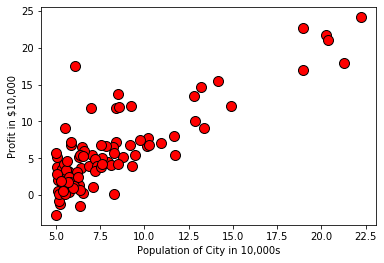

In [6]:
plotData(X, y)


### 2.2 Gradient Descent

In this part, we will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of the model are the $\theta_j$ values. These are
the values we will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

#### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [7]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 2.2.3 Computing the cost $J(\theta)$

As we perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, we will implement a function to calculate $J(\theta)$ so we can check the convergence of the gradient descent implementation. 

In [8]:
def computeCost(X, y, theta):
    """
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    h = np.dot(X,theta)
    er = h - y
    J = 1/(2*m) * np.dot(er.T,er)
    return J

In [10]:
# YOU CAN CHANGE THE VALUE OF A,B FOR DIFFERENT INITIALIZATIONS OF THETA
A = -1
B = 2
J = computeCost(X, y, theta=np.array([A, B]))
print('With theta = [-1,2] \nCost computed =%.3f' %J)


With theta = [-1,2] 
Cost computed =54.242


<a id="section3"></a>
#### 2.2.4 Gradient descent

Next, we will complete a function which implements gradient descent. 


In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # save the cost J in every iteration
        h = np.dot(X,theta)
        er = h - y
        J_history.append(computeCost(X, y, theta))
        theta  = theta - (alpha * (1/m) * np.dot(X.T,er))
    
    return theta, J_history

After we are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01.

In [12]:
# initialize fitting parameters
# FEEL FREE TO CHANGE ANY PARAMETER
A = 0
B = 0
theta = np.array([A,B]) 

# some gradient descent settings
iterations = 1000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: -3.2414, 1.1273


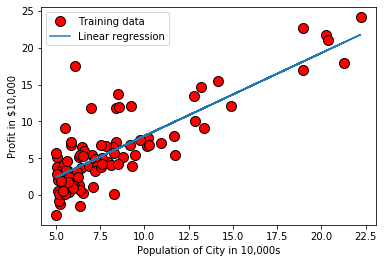

In [13]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

In [14]:
# Now you can predict values for various population sizes.
population_size = 3.5

predict1 = np.dot([1, population_size], theta)
print('For population = ' + str(population_size))
print('we predict a profit of {:.2f}\n'.format(predict1))

For population = 3.5
we predict a profit of 0.70



In [15]:
# Now you can predict values for various population sizes.
population_size = 7

predict1 = np.dot([1, population_size], theta)
print('For population = ' + str(population_size))
print('we predict a profit of {:.2f}\n'.format(predict1))

For population = 7
we predict a profit of 4.65

